## Importing the dependencies

In [116]:
from collections import deque , namedtuple 
import gymnasium as gym
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense , Input 
from tensorflow.keras.losses import MSE 
from tensorflow.keras.optimizers import Adam 
import utils 
%load_ext autoreload 
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating Lunar Lander environment

In [117]:
env = gym.make("LunarLander-v2", render_mode="rgb_array_list")


In [118]:
state_size = env.observation_space.shape
num_actions = env.action_space.n 

## Initializing the hyperparameters

In [119]:


######### CONSTANTS ###########
MEM_SIZE = 100_000         #size of the memory buffer
GAMMA = 0.995              #discount factor
ALPHA = 1e-3               #learning rate
NUM_STEPS_PER_UPDATE = 4 
NUM_EPISODES = 2_000 
MAX_NUM_TIMESTEPS = 1_000 
NUM_POINT_AVG = 100


## Creating the neural network

In [120]:
q_network = Sequential([
    
    Input(state_size) , 
    Dense(64 , activation="relu") , 
    Dense(64 , activation="relu") , 
    Dense(num_actions  , activation="linear") , 
]) ; 
target_q_network = Sequential([
    
    Input(state_size) , 
    Dense(64 , activation="relu") , 
    Dense(64 , activation="relu") , 
    Dense(num_actions  , activation="linear") , 
    
]) ;
target_q_network.set_weights(q_network.get_weights()) ;
optimizer = Adam(learning_rate=ALPHA);



In [121]:
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

## Creating the cost function

In [122]:


def compute_cost(expriences , gamma , q_network , target_q_network) :  

    states , actions , rewards ,  next_states , done_vals = expriences
    max_qsa = tf.reduce_max(target_q_network(next_states) , axis=-1) 
    y_targets = rewards + gamma * ( 1 - done_vals ) * max_qsa 
    q_values = q_network(states) 
    q_values = tf.gather_nd(q_values , tf.stack([tf.range(q_values.shape[0]) , tf.cast(actions , tf.int32)] , axis=1))
    loss = MSE(y_targets , q_values) 
    return loss



In [123]:


def update_networks(expriences , gamma) : 
    
    with tf.GradientTape() as tape :
        loss = compute_cost(expriences , gamma , q_network , target_q_network) 
        
    grads = tape.gradient(loss , q_network.trainable_variables) 
    optimizer.apply_gradients(zip(grads , q_network.trainable_variables)) 
    utils.update_target_network(q_network , target_q_network)



## Training the neural network

In [125]:


epsilon = 1.0
total_points_history = [] 
memory_buffer = deque(maxlen=MEM_SIZE) 

for i in range(NUM_EPISODES) :
    
    state = env.reset() 
#     print(state)
    state = state[0]
    points = 0 
    for t in range(MAX_NUM_TIMESTEPS) : 
        
        q_vals = q_network(state.reshape(1 , -1)) 
        action = utils.get_action(q_vals, epsilon)
        next_state , reward , terminated, truncated , _ = env.step(action)
        done = terminated|truncated
        memory_buffer.append(experience(state , action , reward , next_state , done)) 
        
        if utils.check_update_conditions(t,NUM_STEPS_PER_UPDATE,
                                         len(memory_buffer)) :
            
            experiences = utils.get_experiences(memory_buffer) 
            update_networks(experiences , GAMMA) 
        
        state = next_state.copy()
        points += reward 
        if done : 
            break 
    
    total_points_history.append(points) 
    avg_latest_points = np.mean(total_points_history[-NUM_POINT_AVG:])
    epsilon = utils.get_new_epsilon(epsilon) 
    utils.print_episode_info(i , NUM_POINT_AVG , avg_latest_points) 
    if((i+1)==100):
        utils.make_video("landing_after_100_eps.mp4" , env , q_network) ;
    if((i+1)==101):
        utils.make_video("landing_after_101_eps.mp4" , env , q_network) ;
    if((i+1)==102):
        utils.make_video("landing_after_102_eps.mp4" , env , q_network) ;
    if((i+1)==103):
        utils.make_video("landing_after_103_eps.mp4" , env , q_network) ;
    if((i+1)==300):
        utils.make_video("landing_after_300_eps.mp4" , env , q_network) ;
    if((i+1)==301):
        utils.make_video("landing_after_301_eps.mp4" , env , q_network) ;
    if((i+1)==302):
        utils.make_video("landing_after_302_eps.mp4" , env , q_network) ;
    if((i+1)==303):
        utils.make_video("landing_after_303_eps.mp4" , env , q_network) ;
    if((i+1)==400):
        utils.make_video("landing_after_400_eps.mp4" , env , q_network) ;
    if((i+1)==401):
        utils.make_video("landing_after_401_eps.mp4" , env , q_network) ;
    if((i+1)==402):
        utils.make_video("landing_after_402_eps.mp4" , env , q_network) ;
    if((i+1)==403):
        utils.make_video("landing_after_403_eps.mp4" , env , q_network) ;
    if((i+1)==500):
        utils.make_video("landing_after_500_eps.mp4" , env , q_network) ;
    if((i+1)==501):
        utils.make_video("landing_after_501_eps.mp4" , env , q_network) ;
    if((i+1)==502):
        utils.make_video("landing_after_502_eps.mp4" , env , q_network) ;
    if((i+1)==601):
        utils.make_video("landing_after_601_eps.mp4" , env , q_network) ;
    if((i+1)==602):
        utils.make_video("landing_after_602_eps.mp4" , env , q_network) ;
    if((i+1)==603):
        utils.make_video("landing_after_603_eps.mp4" , env , q_network) ;
    if avg_latest_points >= 200.0 : 
        print(f"Environment solved in {i + 1} episodes")
        q_network.save("NN.h5")
        break 
            

Episode 100 | Total point average of the last 100 episodes: -163.4482025116916
size: (400, 608, 3), type: uint8
size: (400, 608, 3), type: uint8e of the last 100 episodes: -162.51141748730592
size: (400, 608, 3), type: uint8e of the last 100 episodes: -162.02087730541416
size: (400, 608, 3), type: uint8e of the last 100 episodes: -161.57609691399622
Episode 200 | Total point average of the last 100 episodes: -84.204993160847615
Episode 300 | Total point average of the last 100 episodes: -55.618166449802235
size: (400, 608, 3), type: uint8
size: (400, 608, 3), type: uint8e of the last 100 episodes: -56.86542681097396
size: (400, 608, 3), type: uint8e of the last 100 episodes: -53.32316266640944
size: (400, 608, 3), type: uint8e of the last 100 episodes: -51.33509077212756
Episode 400 | Total point average of the last 100 episodes: 36.2455302852367336
size: (400, 608, 3), type: uint8
size: (400, 608, 3), type: uint8e of the last 100 episodes: 37.747210254934885
size: (400, 608, 3), type:

## Plotting Reward 

size: (400, 608, 3), type: uint8


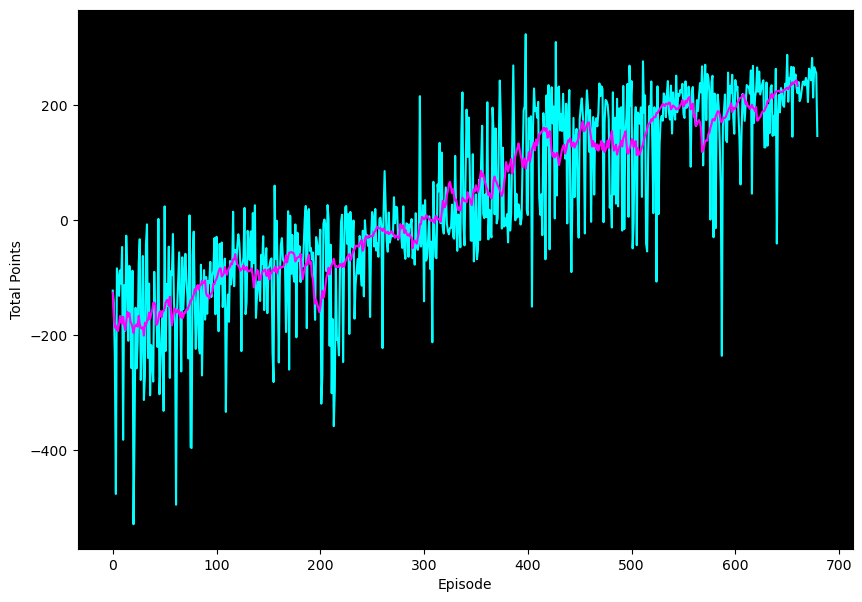

In [126]:
utils.plot_history(total_points_history)
utils.make_video("final_landing.mp4" , env , q_network) ;